In [20]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 3.5 MB/s eta 0:00:0000:0100:01


In [1]:
import pandas as pd

# Replace 'your_file_path' with the actual path to your file in Google Drive
file_path = '/home/abrar/Desktop/Code/Temporal HPC/job_table.parquet'

# Use pd.read_parquet instead of pd.read_csv to read parquet files
df = pd.read_parquet(file_path)

# Now you can work with the dataframe 'df'
# print(df.head())


Statistical Summary of Job Submissions:
Total number of jobs: 231238

Busiest hour: 14
Busiest day of week: 2 (0=Monday, 6=Sunday)
Busiest month: 10


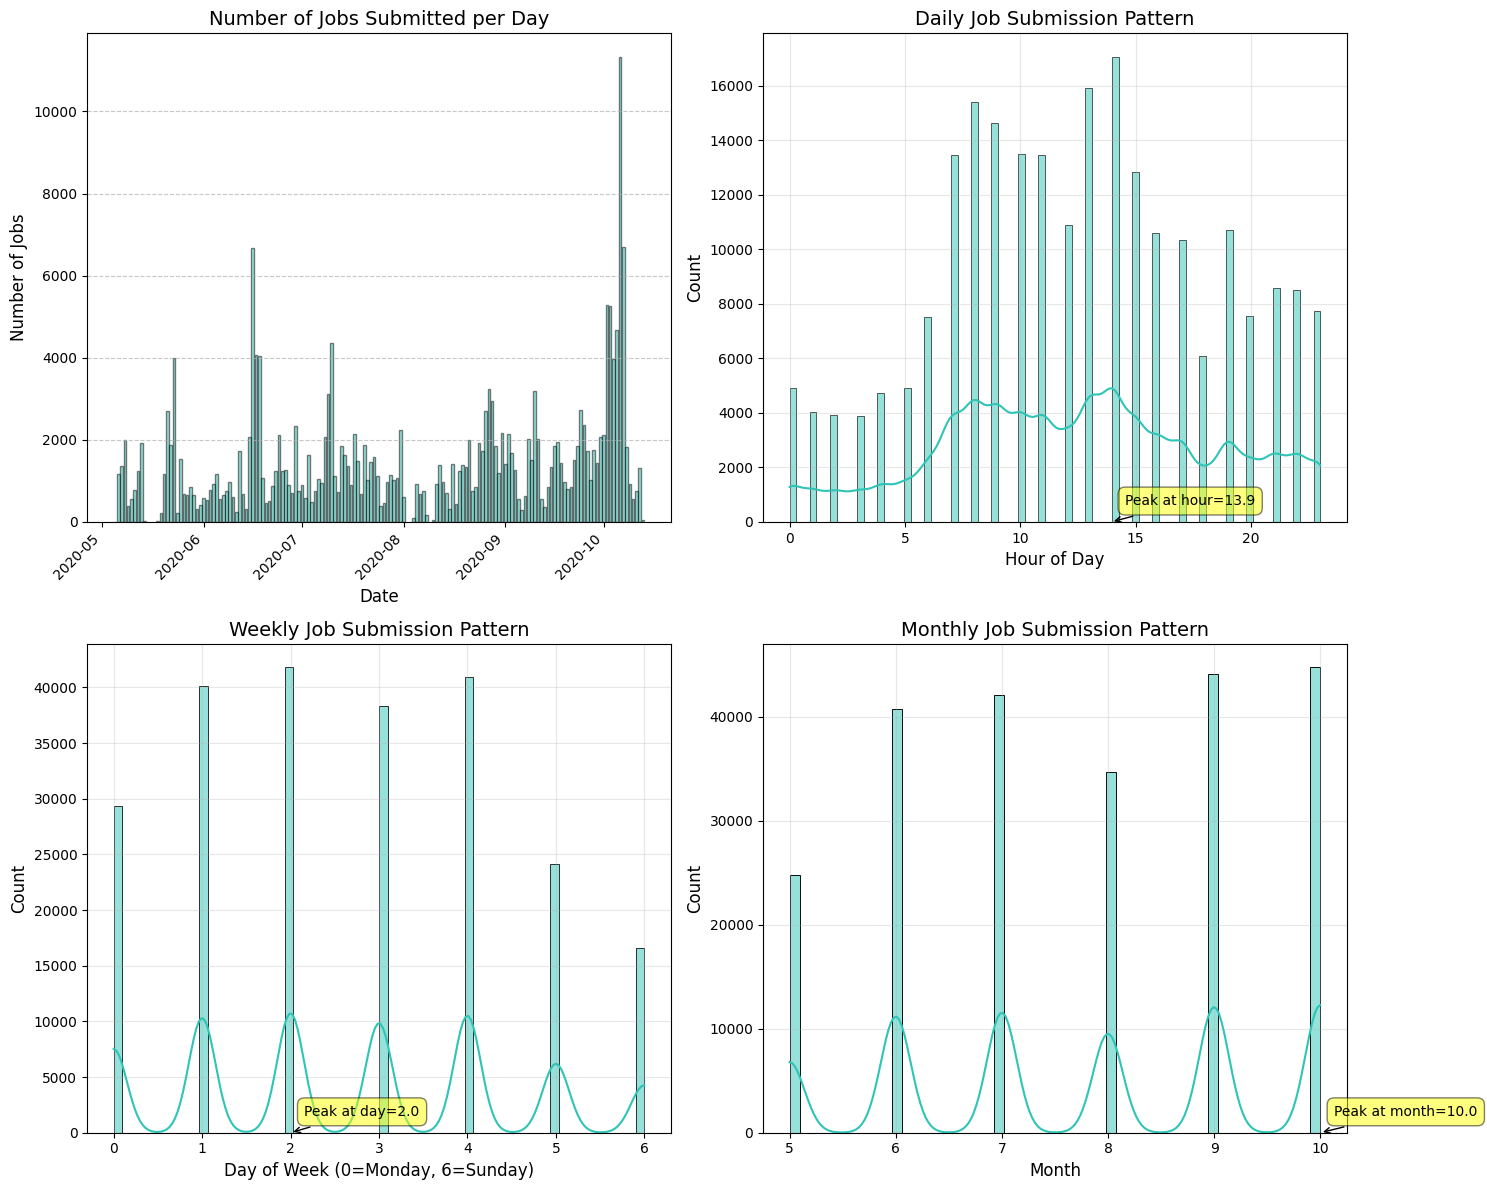

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Assuming your DataFrame is named 'df'
# Convert 'submit_time' to datetime objects if not already done
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract various time components for analysis
df['submit_date'] = df['submit_time'].dt.date
df['hour'] = df['submit_time'].dt.hour
df['day_of_week'] = df['submit_time'].dt.dayofweek
df['month'] = df['submit_time'].dt.month

# Create figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Original histogram of jobs per day
jobs_per_day = df.groupby('submit_date').size()
ax1.bar(jobs_per_day.index, jobs_per_day.values, color='#2ec4b6', alpha=0.5, edgecolor='black')
ax1.set_title('Number of Jobs Submitted per Day', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Jobs', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. Daily submission pattern (hours)
sns.histplot(data=df, x='hour', kde=True, ax=ax2, color='#2ec4b6', alpha=0.5)
ax2.set_title('Daily Job Submission Pattern', fontsize=14)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.grid(True, alpha=0.3)

# 3. Weekly submission pattern
sns.histplot(data=df, x='day_of_week', kde=True, ax=ax3, color='#2ec4b6', alpha=0.5)
ax3.set_title('Weekly Job Submission Pattern', fontsize=14)
ax3.set_xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.grid(True, alpha=0.3)

# 4. Monthly submission pattern
sns.histplot(data=df, x='month', kde=True, ax=ax4, color='#2ec4b6', alpha=0.5)
ax4.set_title('Monthly Job Submission Pattern', fontsize=14)
ax4.set_xlabel('Month', fontsize=12)
ax4.set_ylabel('Count', fontsize=12)
ax4.grid(True, alpha=0.3)

# Function to annotate peaks
def annotate_peaks(ax, data, time_unit):
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    y = kde(x_range)
    peak_idx = np.argmax(y)
    peak_x = x_range[peak_idx]
    peak_y = y[peak_idx]
    
    ax.annotate(f'Peak at {time_unit}={peak_x:.1f}',
                xy=(peak_x, peak_y),
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add peak annotations to the temporal pattern plots
annotate_peaks(ax2, df['hour'], 'hour')
annotate_peaks(ax3, df['day_of_week'], 'day')
annotate_peaks(ax4, df['month'], 'month')

# Adjust layout to prevent overlap
plt.tight_layout()

# Print statistical summary
print("\nStatistical Summary of Job Submissions:")
print("=======================================")
print(f"Total number of jobs: {len(df)}")
print(f"\nBusiest hour: {df['hour'].mode().iloc[0]}")
print(f"Busiest day of week: {df['day_of_week'].mode().iloc[0]} (0=Monday, 6=Sunday)")
print(f"Busiest month: {df['month'].mode().iloc[0]}")


Daily Job Submission Statistics:
Average jobs per day: 1482.3
Median jobs per day: 1139.0
Maximum jobs in a day: 11336
Minimum jobs in a day: 4


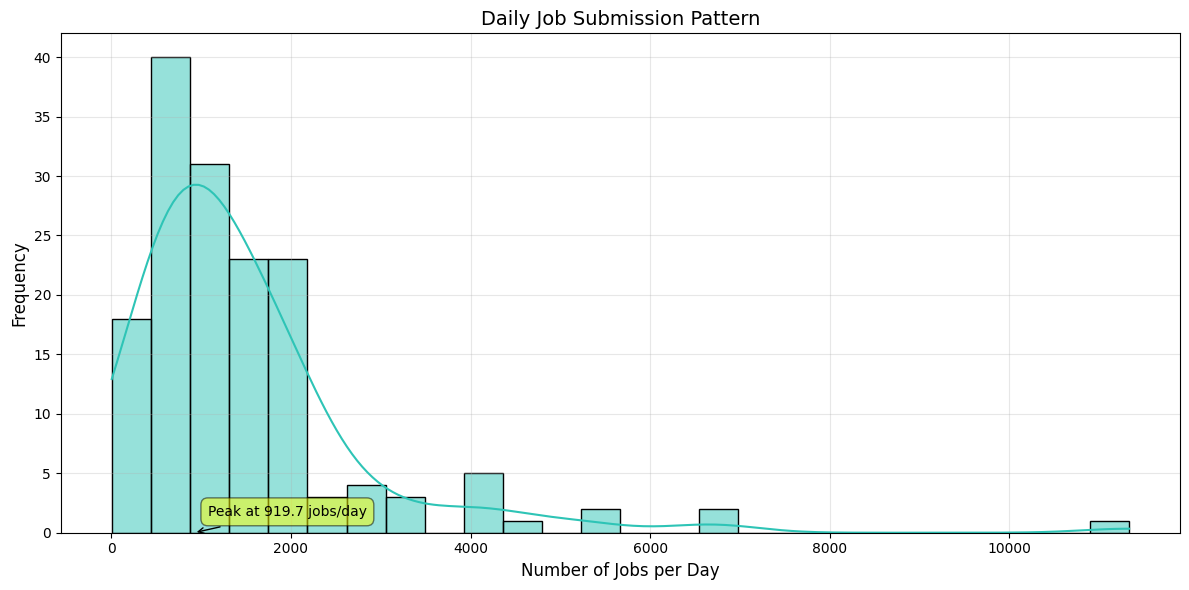

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Assuming your DataFrame is named 'df'
# Convert 'submit_time' to datetime objects if not already done
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the date component
df['submit_date'] = df['submit_time'].dt.date

# Create figure
plt.figure(figsize=(12, 6))

# Create the histogram with KDE plot
jobs_per_day = df.groupby('submit_date').size()
sns.histplot(data=jobs_per_day.values, kde=True, color='#2ec4b6', alpha=0.5)

# Customize the plot
plt.title('Daily Job Submission Pattern', fontsize=14)
plt.xlabel('Number of Jobs per Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add peak annotation
kde = stats.gaussian_kde(jobs_per_day.values)
x_range = np.linspace(jobs_per_day.values.min(), jobs_per_day.values.max(), 100)
y = kde(x_range)
peak_idx = np.argmax(y)
peak_x = x_range[peak_idx]
peak_y = y[peak_idx]

plt.annotate(f'Peak at {peak_x:.1f} jobs/day',
            xy=(peak_x, peak_y),
            xytext=(10, 10),
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Adjust layout
plt.tight_layout()

# Print basic statistics
print("\nDaily Job Submission Statistics:")
print("================================")
print(f"Average jobs per day: {jobs_per_day.mean():.1f}")
print(f"Median jobs per day: {jobs_per_day.median():.1f}")
print(f"Maximum jobs in a day: {jobs_per_day.max()}")
print(f"Minimum jobs in a day: {jobs_per_day.min()}")

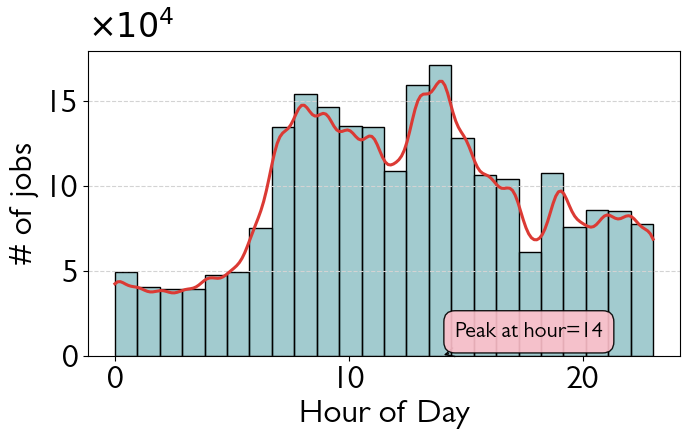

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Convert 'submit_time' to datetime objects if not already done
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the hour component for analysis
df['hour'] = df['submit_time'].dt.hour

# Create a single figure for the daily job submission pattern with matched dimensions
fig, ax = plt.subplots(figsize=(7, 4.5))

# Plot histogram with KDE, matching the aesthetic style
sns.histplot(data=df, x='hour', kde=True, ax=ax, color='#177e89', alpha=0.4, bins=24)
kde_line = ax.lines[0]
kde_line.set_color('#db3a34')
kde_line.set_linewidth(2.2)

# ax.set_title('Daily Job Submission Pattern', fontsize=13)
ax.set_xlabel('Hour of Day', fontsize=24)
ax.set_ylabel('# of jobs', fontsize=24)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=24)

# Add gridlines
ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Annotate peak (function remains the same)
def annotate_peaks(ax, data, time_unit):
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    y = kde(x_range)
    peak_idx = np.argmax(y)
    peak_x = x_range[peak_idx]
    peak_y = y[peak_idx]

    ax.annotate(
        f'Peak at {time_unit}={peak_x:.0f}',
        xy=(peak_x, peak_y),
        xytext=(10, 10),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=16,  # Increased font size
        bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.9),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

# Annotate the peak for the hourly distribution
annotate_peaks(ax, df['hour'], 'hour')

# Customize y-axis ticks to show integers with 10^4 on top
def format_func(value, tick_number):
    return f'{int(value / 1000)}'

ax.yaxis.set_major_formatter(FuncFormatter(format_func))
ax.tick_params(axis='y', which='major', labelsize=24)
ax.text(0, 1.02, r'$\times 10^4$', transform=ax.transAxes, fontsize=24, va='bottom', ha='left')

# Tight layout and save
plt.tight_layout()
plt.savefig("hourly_job_submission_pattern.pdf", bbox_inches='tight')

# Show the plot
plt.show()

501595.1212994379


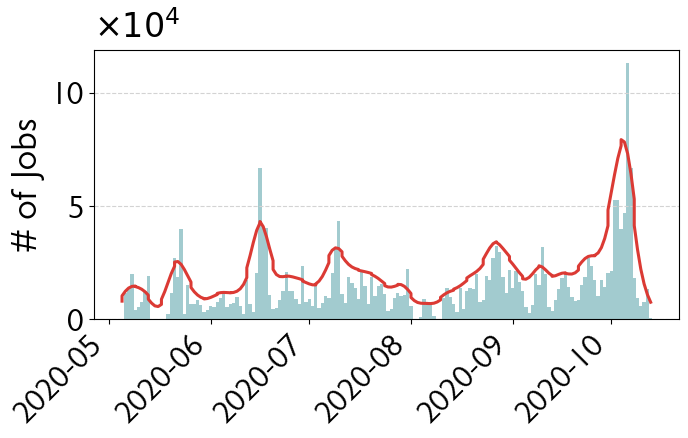


Daily Job Submission Statistics:
Average jobs per day: 1482.3
Maximum jobs in a day: 11336
Minimum jobs in a day: 4


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'
# Convert 'submit_time' to datetime objects
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the date part from 'submit_time'
df['submit_date'] = df['submit_time'].dt.date

# Group by date and count the number of jobs
jobs_per_day = df.groupby('submit_date').size()

# Create the figure with matched dimensions and white background
fig, ax = plt.subplots(figsize=(7, 4.5))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')       # Set axes background to white

# Plot the histogram bars with matched color and lower alpha
plt.bar(jobs_per_day.index, jobs_per_day.values,
        color='#177e89', alpha=0.4,
        width=1.0)

# Calculate KDE over time
# Convert dates to ordinal numbers for KDE calculation
x_ord = np.array([pd.Timestamp(date).toordinal() for date in jobs_per_day.index])
kde = stats.gaussian_kde(x_ord, weights=jobs_per_day.values, bw_method=0.05)

# Create points for the KDE curve
x_kde = np.linspace(x_ord.min(), x_ord.max(), 200)
y_kde = kde(x_kde)

# Convert x_kde back to dates for plotting
x_dates = [pd.Timestamp.fromordinal(int(x)) for x in x_kde]

# Scale the KDE to match the data range
scaling_factor = jobs_per_day.max() / y_kde.max()
print(scaling_factor)
y_kde = y_kde * scaling_factor*0.7

# Plot the KDE curve with matched color and linewidth
plt.plot(x_dates, y_kde, color='#db3a34', linewidth=2.2)

# Customize the plot
# plt.xlabel('Date', fontsize=12)  # Matched x-axis label
plt.ylabel('# of Jobs', fontsize=26)  # Matched y-axis label
ax.tick_params(axis='both', which='major', labelsize=24)  # Matched tick label size

# Add gridlines with matched style
plt.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set y-axis limits to start from 0
plt.ylim(bottom=0)

# Customize y-axis ticks to show integers with 10^4 on top
def format_func(value, tick_number):
    return f'{int(value / 1000)}'

ax.yaxis.set_major_formatter(FuncFormatter(format_func))
ax.tick_params(axis='y', which='major', labelsize=24)
ax.text(0, 1.02, r'$\times 10^4$', transform=ax.transAxes, fontsize=24, va='bottom', ha='left')

# Adjust layout
plt.tight_layout()

# Save the plot (optional)
plt.savefig("daily_job_submissions_kde.pdf", bbox_inches='tight')

# Show the plot
plt.show()

print("\nDaily Job Submission Statistics:")
print("================================")
print(f"Average jobs per day: {jobs_per_day.mean():.1f}")
print(f"Maximum jobs in a day: {jobs_per_day.max()}")
print(f"Minimum jobs in a day: {jobs_per_day.min()}")

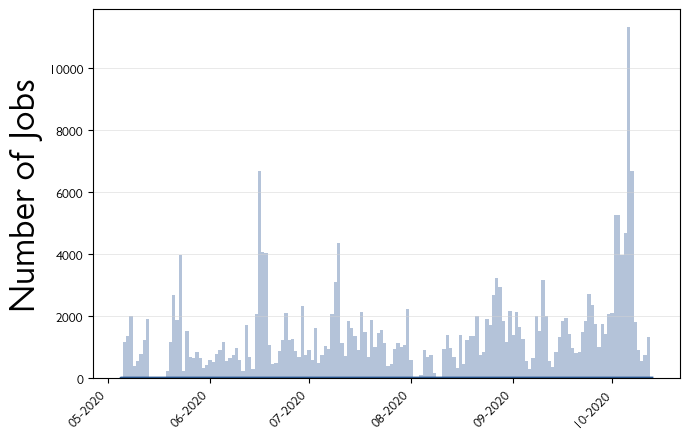


Daily Job Submission Statistics:
Average jobs per day: 1482.3
Maximum jobs in a day: 11336
Minimum jobs in a day: 4


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.dates as mdates

# Assuming your DataFrame is named 'df'
# Convert 'submit_time' to datetime objects
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the date part from 'submit_time'
df['submit_date'] = df['submit_time'].dt.date

# Group by date and count the number of jobs
jobs_per_day = df.groupby('submit_date').size()

# Create the figure with matched dimensions and white background
fig, ax = plt.subplots(figsize=(7, 4.5))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')       # Set axes background to white

# Convert dates to ordinal numbers for KDE calculation
x_ord = np.array([pd.Timestamp(date).toordinal() for date in jobs_per_day.index])

# Calculate KDE with a larger bandwidth to smooth out peaks
kde = stats.gaussian_kde(x_ord, weights=jobs_per_day.values, bw_method=0.01)  # Increased bandwidth

# Create points for the KDE curve
x_kde = np.linspace(x_ord.min(), x_ord.max(), 200)
y_kde = kde(x_kde)

# Convert x_kde back to dates for plotting
x_dates = [pd.Timestamp.fromordinal(int(x)) for x in x_kde]

# Plot the histogram bars with a color similar to the provided plot and lower alpha
plt.bar(jobs_per_day.index, jobs_per_day.values,
        color='#95aac9', alpha=0.7,  # Changed bar color to match
        width=1.0)

# Plot the KDE curve with a darker, thicker line
plt.plot(x_dates, y_kde, color='#295894', linewidth=2.5)  # Changed line color and width to match

# Customize the plot
plt.ylabel('Number of Jobs', fontsize=26)
# ax.tick_params(axis='both', which='major')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set y-axis limits to start from 0
plt.ylim(bottom=0)

# Format x-axis to show dates properly
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

# Add a light grid
ax.grid(which='major', axis='y', linestyle='-', color='lightgray', linewidth=0.5, alpha=0.7, zorder=0)

# Adjust layout
plt.tight_layout()

# Save the plot (optional)
plt.savefig("daily_job_submissions_aesthetic_smoothed.pdf", bbox_inches='tight')

# Show the plot
plt.show()

print("\nDaily Job Submission Statistics:")
print("================================")
print(f"Average jobs per day: {jobs_per_day.mean():.1f}")
print(f"Maximum jobs in a day: {jobs_per_day.max()}")
print(f"Minimum jobs in a day: {jobs_per_day.min()}")


Daily Job Submission Statistics:
Average jobs per day: 1482.3
Maximum jobs in a day: 11336
Minimum jobs in a day: 4


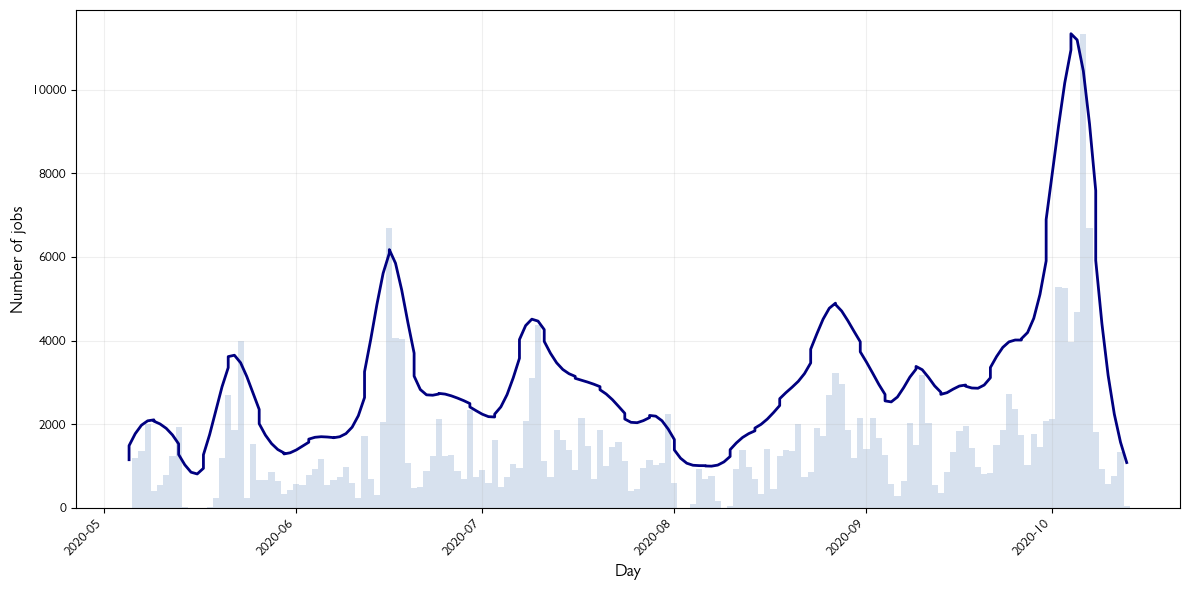

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'
# Convert 'submit_time' to datetime objects
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the date part from 'submit_time'
df['submit_date'] = df['submit_time'].dt.date

# Group by date and count the number of jobs
jobs_per_day = df.groupby('submit_date').size()

# Create the figure with a white background
plt.figure(figsize=(12, 6))
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Plot the histogram bars with lower alpha for better visibility of the KDE
plt.bar(jobs_per_day.index, jobs_per_day.values, 
        color='lightsteelblue', alpha=0.5, 
        width=1.0)  # width=1.0 ensures bars touch each other

# Calculate KDE over time
# Convert dates to ordinal numbers for KDE calculation
x_ord = np.array([pd.Timestamp(date).toordinal() for date in jobs_per_day.index])
kde = stats.gaussian_kde(x_ord, weights=jobs_per_day.values, bw_method=0.05)

# Create points for the KDE curve
x_kde = np.linspace(x_ord.min(), x_ord.max(), 200)
y_kde = kde(x_kde)

# Convert x_kde back to dates for plotting
x_dates = [pd.Timestamp.fromordinal(int(x)) for x in x_kde]

# Scale the KDE to match the data range
scaling_factor = jobs_per_day.max() / y_kde.max()
y_kde = y_kde * scaling_factor

# Plot the KDE curve
plt.plot(x_dates, y_kde, color='navy', linewidth=2)

# Customize the plot
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set y-axis limits to start from 0
plt.ylim(bottom=0)

# Add gridlines
plt.grid(True, axis='both', linestyle='-', alpha=0.2)

# Adjust layout
plt.tight_layout()

print("\nDaily Job Submission Statistics:")
print("================================")
print(f"Average jobs per day: {jobs_per_day.mean():.1f}")
print(f"Maximum jobs in a day: {jobs_per_day.max()}")
print(f"Minimum jobs in a day: {jobs_per_day.min()}")

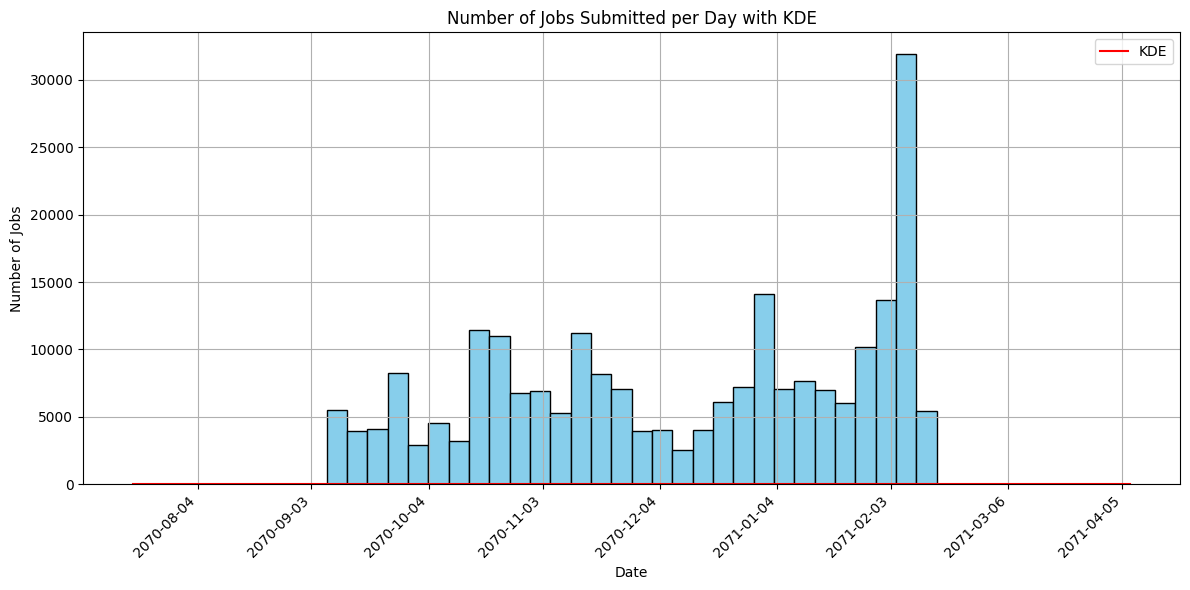

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your DataFrame is named 'df'

# Convert 'submit_time' to datetime objects
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Extract the date part from 'submit_time'
df['submit_date'] = df['submit_time'].dt.date

# Group by date and count the number of jobs
jobs_per_day = df.groupby('submit_date').size()

# Convert dates to numerical representation (method 1)
x_numeric = pd.to_datetime(jobs_per_day.index).astype(int) / 10**9 / (24 * 60 * 60)  # Convert to days

# Create the plot
plt.figure(figsize=(12, 6))

# Histogram
plt.hist(jobs_per_day.index, weights=jobs_per_day.values, bins=30, color='skyblue', edgecolor='black')

# KDE Plot (overlay)
sns.kdeplot(x=x_numeric, weights=jobs_per_day.values, color='red', label='KDE')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Submitted per Day with KDE')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show dates
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[pd.to_datetime(jobs_per_day.index.min() + pd.Timedelta(days=int(t))).strftime('%Y-%m-%d') for t in plt.xticks()[0]],
    rotation=45,
    ha='right'
)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'mdates' is not defined